In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error as mae
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

In [94]:
df=pd.read_csv(r"C:\Users\shash\Downloads\ola_cleaned.csv")
df.head()

,season,weather,temp,humidity,windspeed,casual,registered,count,time,day,...,weekday,am_or_pm,holidays,lag1,lag2,lag3,rolling_3,rolling_6,is_peak,weekend_bad_weather
0,3,2,7.653428,122.430885,18.783703,5,128,315.731778,0,1,...,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0
1,4,3,13.269244,101.703802,14.035245,36,184,340.457093,1,1,...,0,0,0,315.731778,NaN,NaN,NaN,NaN,0,0
2,1,3,30.886922,77.583743,45.365080,34,97,224.278595,2,1,...,0,0,0,340.457093,315.731778,NaN,293.489155,NaN,0,0
3,3,1,10.463377,114.925671,25.347168,6,47,132.169549,3,1,...,0,0,0,224.278595,340.457093,315.731778,232.301746,NaN,0,0
4,3,4,30.214783,149.193592,20.288982,14,199,315.867137,4,1,...,0,0,0,132.169549,224.278595,340.457093,224.105094,NaN,0,0


EXPLORATORY DATA ANALYSIS(EDA)

In [97]:
df.isnull().sum()

season                    0
weather                   0
temp                   1632
humidity               1632
windspeed              1632
casual                    0
registered                0
count                     0
time                      0
day                       0
month                     0
year                      0
weekday                   0
am_or_pm                  0
holidays                  0
lag1                      1
lag2                      2
lag3                      3
rolling_3                 2
rolling_6                 5
is_peak                   0
weekend_bad_weather       0
dtype: int64

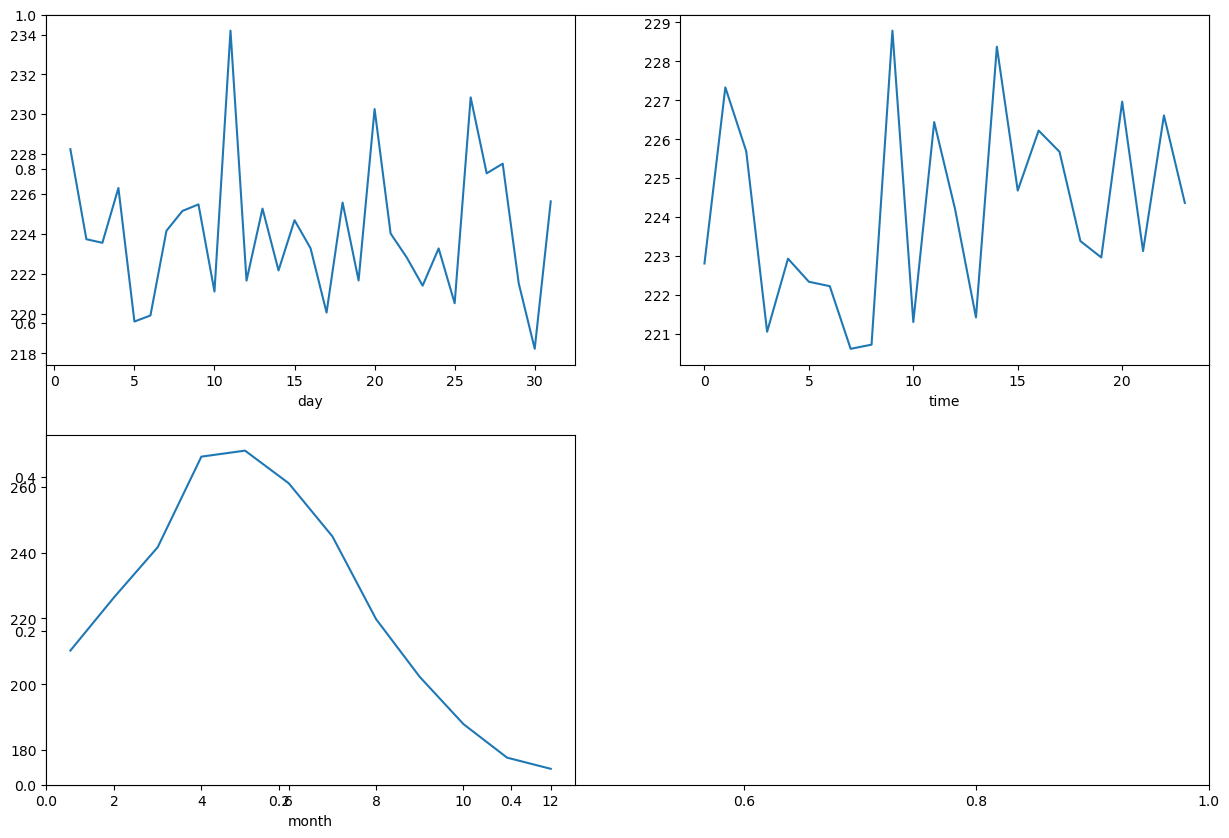

In [99]:
features=['day','time','month']
plt.subplots(figsize=(15,10))
for i,col in enumerate(features):
    plt.subplot(2,2,i+1)
    df.groupby(col).mean()['count'].plot()
plt.show()

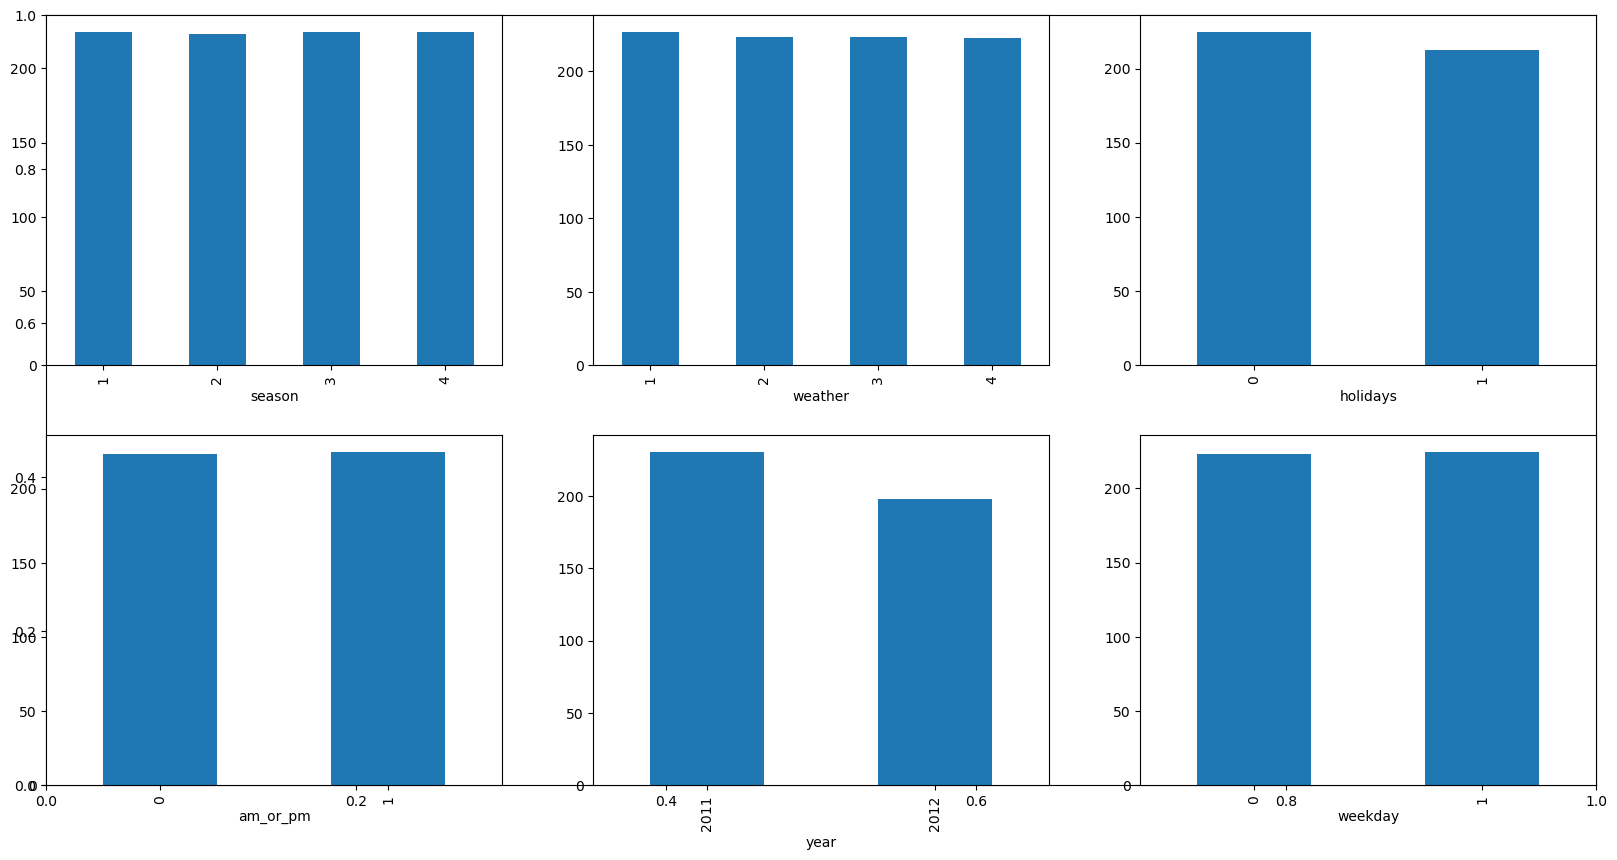

In [101]:
features=['season','weather','holidays',\
          'am_or_pm','year','weekday']
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    df.groupby(col).mean()['count'].plot.bar()

plt.show()

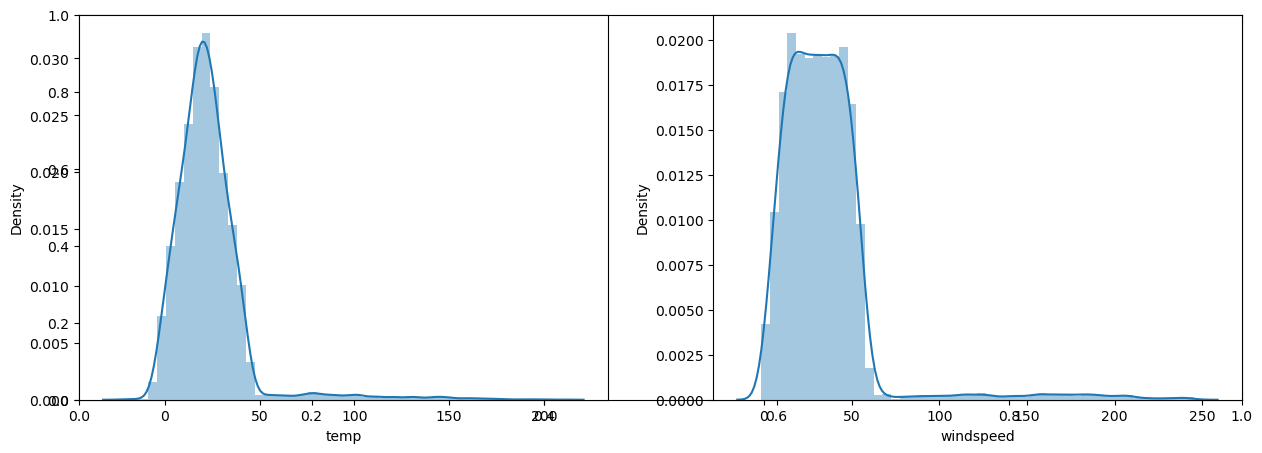

In [103]:
features=['temp','windspeed']

plt.subplots(figsize=(15,5))

for i,col in enumerate(features):
    plt.subplot(1,2,i+1)
    sb.distplot(df[col])

plt.show()

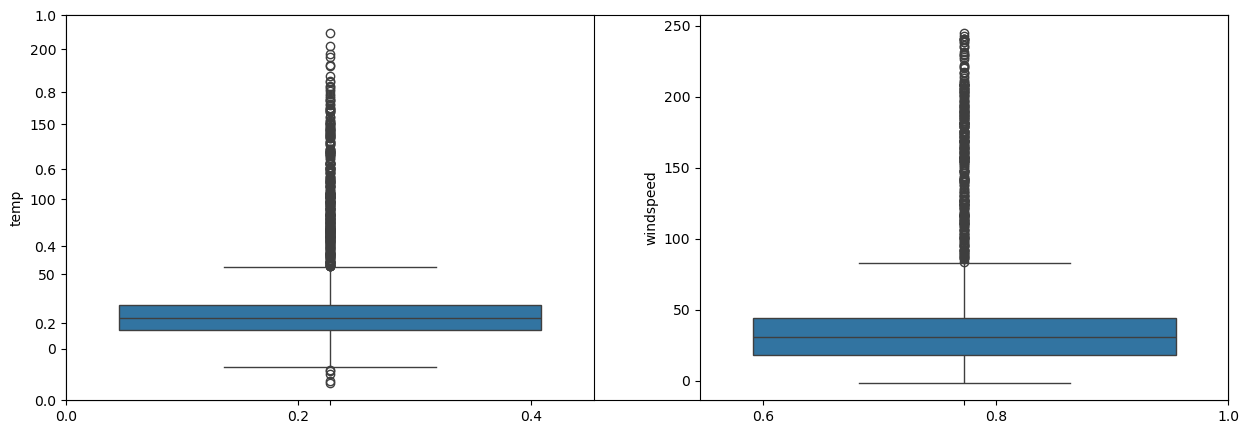

In [104]:
features=['temp','windspeed']
plt.subplots(figsize=(15,5))
for i,col in enumerate(features):
    plt.subplot(1,2,i+1)
    sb.boxplot(df[col])

plt.show()

In [107]:
#to check how any data we lose if we remove outliers

num_rows=df.shape[0]-df[df['windspeed']<32].shape[0]
print(f'Number of rows that will be lost if we remove outliers is equal to {num_rows}.')

Number of rows that will be lost if we remove outliers is equal to 6091.


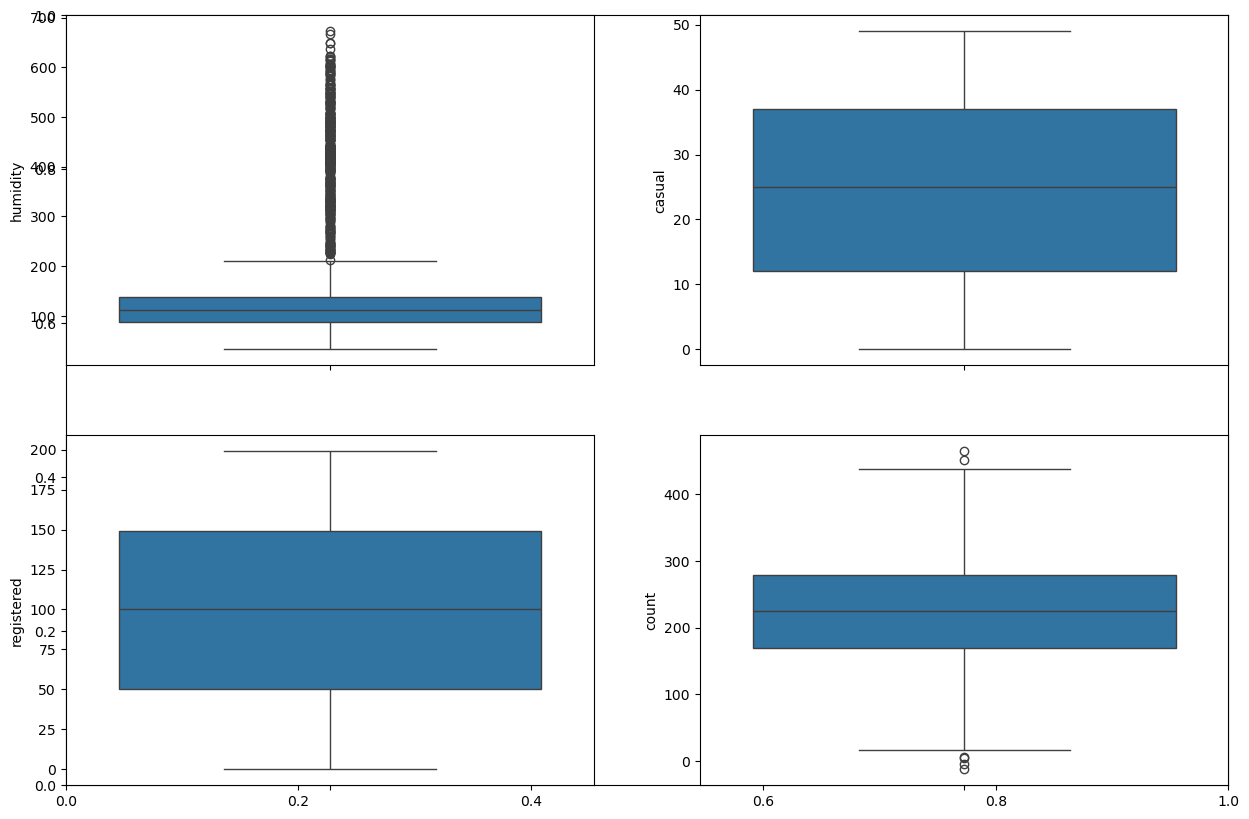

In [109]:
#we can remove these many rows as our dataset has 10000 rows

features=['humidity','casual','registered','count']
plt.subplots(figsize=(15,10))
for i,col in enumerate(features):
    plt.subplot(2,2,i+1)
    sb.boxplot(df[col])

plt.show()

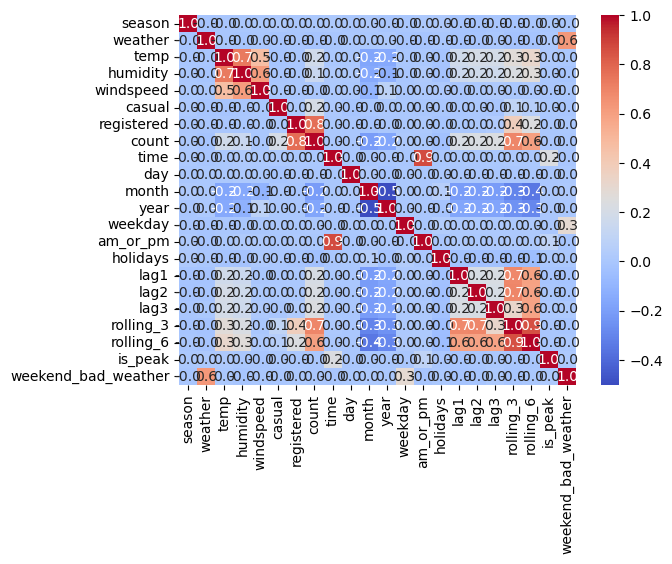

In [111]:
sb.heatmap(df.corr(),
          annot=True,
          cmap='coolwarm',
          fmt=".1f")
plt.show()

In [112]:
#since our target variable count is highly correlated with registered and also causing data leakage we remove it(count =registered +casual) so its cheating
#if feature is highly correlated we dont remove, only remove if there is data leakage also

In [115]:
df.drop(['registered','time'],axis=1,inplace=True)
df=df[(df['windspeed']<32) & (df['humidity']>0)]

In [117]:
df.head()

,season,weather,temp,humidity,windspeed,casual,count,day,month,year,weekday,am_or_pm,holidays,lag1,lag2,lag3,rolling_3,rolling_6,is_peak,weekend_bad_weather
0,3,2,7.653428,122.430885,18.783703,5,315.731778,1,1,2011,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0
1,4,3,13.269244,101.703802,14.035245,36,340.457093,1,1,2011,0,0,0,315.731778,NaN,NaN,NaN,NaN,0,0
3,3,1,10.463377,114.925671,25.347168,6,132.169549,1,1,2011,0,0,0,224.278595,340.457093,315.731778,232.301746,NaN,0,0
4,3,4,30.214783,149.193592,20.288982,14,315.867137,1,1,2011,0,0,0,132.169549,224.278595,340.457093,224.105094,NaN,0,0
5,4,1,7.320588,114.293268,28.498988,20,103.664368,1,1,2011,0,0,0,315.867137,132.169549,224.278595,183.900352,238.694753,0,0


In [119]:
df.to_csv(r"C:\Users\shash\Downloads\ola_eda.csv",index=False)